In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Base Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

# Plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('fivethirtyeight')

# Set display options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

# set seed
np.random.seed(2024)

In [8]:
# Load down_ohlc dict 
ohlc = np.load('dow_ohlc.npy', allow_pickle='TRUE').item()
ohlc.keys()

dict_keys(['VZ', 'WMT', 'V', 'MRK', 'GS', 'DOW', 'PG', 'JNJ', 'JPM', 'IBM', 'AXP', 'KO', 'CVX', 'WBA', 'TRV', 'MSFT', 'AAPL', 'DIS', 'MCD', 'CAT', 'NKE', 'AMGN', 'HD', 'CSCO', 'HON', 'INTC', 'MMM', 'BA', 'UNH', 'CRM'])

In [9]:
dow_stocks = sorted(list(ohlc.keys()))
dow_stocks

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [44]:
df = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in dow_stocks})
df.head(10)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-22,6.102983,45.428261,32.937492,44.671463,39.772785,16.135000,17.317009,49.336967,26.113466,131.716766,21.490070,29.563036,88.594124,14.363685,45.837414,29.539711,18.034088,45.780384,61.171780,26.800299,22.614508,11.501710,43.512447,37.017990,28.044781,16.965599,17.327103,27.787218,40.563843
2010-01-25,6.267169,44.713924,32.254673,44.679207,40.425278,16.032499,17.332085,49.310513,26.061203,132.451752,21.412544,29.815088,89.031784,14.659472,45.851925,29.577446,18.070665,45.563728,61.434563,26.724459,22.895632,11.627723,43.743336,37.462440,27.909462,16.822048,17.521273,28.312225,40.517879
2010-01-26,6.355743,45.412209,32.519268,44.625076,40.945816,16.352501,17.264231,49.045944,25.834743,128.947754,21.497826,29.629747,88.770592,14.428608,45.540043,28.996601,18.000843,46.083702,61.284401,26.600353,23.036182,11.640506,43.786625,38.489216,27.435850,16.641582,17.230013,27.926195,41.077225
2010-01-27,6.415617,46.343246,33.005783,47.888248,39.178947,16.350000,17.452709,48.748283,25.538593,129.477600,21.583105,29.844732,89.180031,14.601756,46.011478,29.667953,18.123861,46.025936,61.787361,26.641716,23.168941,11.687987,43.873192,39.002605,28.112448,17.207582,17.058683,28.335400,40.916313
2010-01-28,6.150510,46.616138,31.947412,48.375408,38.020580,16.040001,16.977749,48.444023,25.564722,131.007477,21.195478,29.518560,87.358727,14.370895,46.272568,29.781107,18.014141,45.375942,60.623722,26.179766,22.770683,11.600327,44.500866,38.519859,28.273130,16.949194,16.750286,28.103769,40.310997
2010-01-29,5.927377,46.937176,32.143719,46.859806,38.299179,15.887500,16.940058,47.703213,25.738926,127.101753,21.714901,28.643829,86.398659,13.995754,45.590816,29.373755,18.037418,45.087067,60.428509,26.324554,22.005415,11.642331,44.407097,38.826378,27.909462,16.822048,16.801687,27.833538,40.939312
2010-02-01,6.009779,47.129822,32.613152,47.710403,38.812386,16.295000,17.136072,48.668907,25.712797,130.870697,22.009493,29.184986,88.008171,14.147258,45.757626,29.894258,18.080643,46.141479,60.390984,26.407293,22.185013,11.706245,44.724545,38.841705,28.019415,17.156313,16.910196,28.088322,40.977615
2010-02-02,6.044655,47.539143,33.304512,47.895981,39.259590,16.264999,17.354698,49.244354,26.113466,134.126846,22.505659,29.296181,88.615311,14.363685,46.410374,30.588243,18.303398,46.242592,60.383484,27.262260,22.224060,11.675206,45.381084,39.148205,28.797495,17.228094,16.978729,28.397158,40.985275
2010-02-03,6.148659,47.410728,32.715580,47.849266,39.142281,16.405001,17.392397,48.424202,26.784159,134.374695,22.071514,29.066378,88.707077,14.311325,46.149284,30.392120,18.243561,47.094788,61.186794,26.696884,22.356808,11.687987,45.200726,38.749760,28.180082,17.127604,16.670334,26.729464,41.582928


In [11]:
df.shape

(2706, 30)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2705.0,30.047436,21.270880,5.927071,14.999914,24.668011,40.598782,134.179993
AMGN,2705.0,122.692630,57.688231,38.742432,68.694923,132.670822,163.988373,259.213684
AXP,2705.0,71.997918,24.876817,31.401155,50.829639,72.261726,89.625107,135.558502
BA,2705.0,153.848461,106.307919,41.856789,61.374840,116.978035,194.325790,430.299988
CAT,2705.0,88.018466,29.550767,37.228798,66.677711,77.293983,115.443932,159.491608
CRM,2705.0,79.807642,50.328566,15.520000,38.060001,67.839996,109.150002,281.250000
CSCO,2705.0,26.304599,11.800751,10.426702,16.940058,22.859888,36.486423,55.699444
CVX,2705.0,86.346505,17.632351,45.367470,74.307068,87.029297,99.060753,119.106483
DIS,2705.0,80.097052,34.339309,25.536150,44.453819,89.787476,105.570000,150.736893
DOW,387.0,43.627492,6.573014,21.285501,40.732752,44.775864,48.306002,54.396061


In [13]:
df.isnull().sum()

AAPL       1
AMGN       1
AXP        1
BA         1
CAT        1
CRM        1
CSCO       1
CVX        1
DIS        1
DOW     2319
GS         1
HD         1
HON        1
IBM        1
INTC       1
JNJ        1
JPM        1
KO         1
MCD        1
MMM        1
MRK        1
MSFT       1
NKE        1
PG         1
TRV        1
UNH        1
V          1
VZ         1
WBA        1
WMT        1
dtype: int64

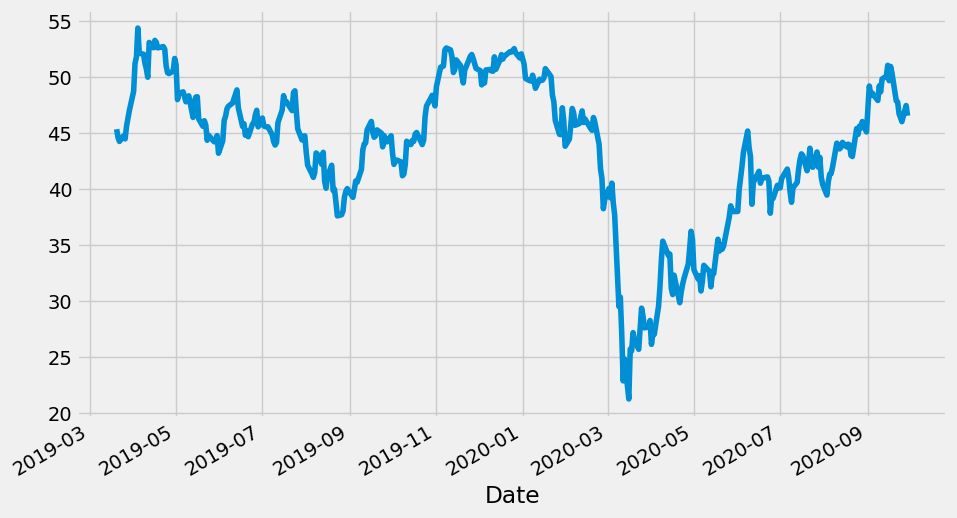

In [14]:
ohlc['DOW']['Close'].plot();

In [15]:
# Get the index of the NaN values
[df[x].index[df[x].apply(np.isnan)] for x in dow_stocks]

[DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2016-01-18'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
                ...
                '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13', '201

In [18]:
# Fill forward the missing values and drop DOW from the list
df.fillna(method='ffill', axis=0, inplace=True)
df.drop(['DOW'], axis=1, inplace=True)
df.dropna(inplace=True)

In [19]:
np.isnan(df.any()).sum()

0

In [20]:
# remove dow chemicals from the stock list
dow_stocks.remove('DOW')

In [21]:
# add ATR features

newdict = {}
for symbol in dow_stocks:
    data = ohlc[symbol]
    data.dropna(inplace=True)

    high = data['High']
    low = data['Low']
    close = data['Close']
    data['ATR'] = ta.atr(high, low, close)
    data.dropna(inplace=True)

    newdict.update({symbol: data})

In [45]:
df2 = pd.DataFrame({symbol: newdict[symbol]['ATR'] for symbol in dow_stocks})
df2.head(10)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-22,0.174050,0.961966,1.104964,1.320743,1.549410,0.525684,0.484901,0.959965,0.534944,4.693014,0.459710,0.715524,1.878451,0.400242,0.748170,1.095005,0.315696,0.729516,1.036561,0.758404,0.551396,0.192417,0.747327,0.777582,1.101353,0.395592,0.354673,0.493939,0.656078
2010-01-25,0.178355,0.965509,1.149978,1.283041,1.535877,0.526676,0.468593,0.940860,0.541050,4.573718,0.447085,0.701697,1.782936,0.409090,0.718710,1.062754,0.305449,0.704136,1.038905,0.752535,0.550889,0.192541,0.731518,0.789428,1.052534,0.405874,0.364945,0.514508,0.622125
2010-01-26,0.195340,0.962789,1.181816,1.252083,1.554357,0.545274,0.463820,0.924367,0.540946,4.613129,0.436983,0.686709,1.769456,0.398920,0.719387,1.074480,0.295577,0.724564,1.062549,0.731158,0.555269,0.192648,0.726776,0.884771,0.992991,0.396821,0.382037,0.508441,0.647191
2010-01-27,0.209868,0.989236,1.149930,1.464193,1.751738,0.522561,0.455157,0.913319,0.556490,4.550254,0.426650,0.687717,1.728165,0.395830,0.721420,1.074148,0.297931,0.702723,1.093595,0.714627,0.562193,0.190192,0.728406,0.863784,1.013728,0.429233,0.383805,0.513944,0.633847
2010-01-28,0.216990,0.988263,1.190713,1.445182,1.768846,0.519403,0.474623,0.944057,0.567565,4.544105,0.442413,0.716637,1.833722,0.407117,0.723904,1.066543,0.291932,0.713016,1.244545,0.712189,0.581887,0.200615,0.832682,0.861014,1.001539,0.448661,0.405844,0.511274,0.642226
2010-01-29,0.231346,0.959323,1.191919,1.533734,1.734690,0.516623,0.478932,0.999893,0.560844,4.685774,0.455559,0.805889,1.867258,0.432063,0.754896,1.040587,0.297024,0.702276,1.247546,0.732861,0.693743,0.201159,0.806475,0.844808,0.974011,0.466543,0.397169,0.540316,0.693077
2010-02-01,0.223370,0.905525,1.133034,1.482032,1.659743,0.508848,0.473687,1.006513,0.543625,4.768491,0.452147,0.784848,1.861705,0.415468,0.717972,1.013435,0.286781,0.740161,1.198163,0.700814,0.670042,0.198434,0.780616,0.818427,0.977007,0.474977,0.386853,0.518922,0.662305
2010-02-02,0.211364,0.888218,1.104643,1.417873,1.582502,0.496280,0.471754,1.010004,0.556705,4.674915,0.463851,0.750038,1.812038,0.409205,0.756055,0.993395,0.292724,0.718923,1.173974,0.738485,0.634836,0.191712,0.800081,0.808156,0.979671,0.449988,0.372513,0.515280,0.629402
2010-02-03,0.208434,0.849245,1.069449,1.357627,1.500544,0.492835,0.456637,1.002541,0.590814,4.487405,0.475673,0.723582,1.713787,0.399341,0.733993,0.967470,0.282079,0.765402,1.193065,0.738419,0.624920,0.187336,0.763619,0.791502,0.985055,0.453553,0.380007,0.644391,0.642236


In [46]:
df2 = df2.resample('W-FRI').mean()
df2.head(10)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-22,0.174050,0.961966,1.104964,1.320743,1.549410,0.525684,0.484901,0.959965,0.534944,4.693014,0.459710,0.715524,1.878451,0.400242,0.748170,1.095005,0.315696,0.729516,1.036561,0.758404,0.551396,0.192417,0.747327,0.777582,1.101353,0.395592,0.354673,0.493939,0.656078
2010-01-29,0.206380,0.973024,1.172871,1.395647,1.669102,0.526108,0.468225,0.944499,0.553379,4.593396,0.441738,0.719730,1.796308,0.408604,0.727663,1.063702,0.297583,0.709343,1.137428,0.728674,0.588796,0.195431,0.765171,0.848761,1.006961,0.429426,0.386760,0.517697,0.647693
2010-02-05,0.212091,0.891167,1.086843,1.418146,1.538339,0.512905,0.466927,1.022311,0.589111,4.629791,0.469604,0.758085,1.764337,0.409320,0.743854,1.005781,0.292351,0.763719,1.225786,0.752493,0.635230,0.197058,0.780501,0.803645,0.970286,0.469039,0.375942,0.612722,0.655636
2010-02-12,0.186792,0.923723,1.030734,1.408264,1.522145,0.522971,0.438313,1.043349,0.615307,4.278867,0.484563,0.755575,1.613730,0.407521,0.748349,0.979711,0.332251,0.791406,1.274099,0.760694,0.576571,0.206215,0.731923,0.798733,0.896254,0.454435,0.350308,0.630516,0.626428
2010-02-19,0.166090,0.826971,0.960663,1.333946,1.440045,0.486039,0.387791,1.035457,0.567172,3.769493,0.462576,0.733995,1.488976,0.394418,0.713976,0.901023,0.327204,0.726354,1.223232,0.724271,0.517585,0.203015,0.696508,0.799868,0.908611,0.396515,0.308842,0.584382,0.596620
2010-02-26,0.152303,0.752207,0.865666,1.265500,1.324678,0.472542,0.358895,0.968258,0.526115,3.352595,0.447389,0.686453,1.364405,0.366362,0.656905,0.887923,0.315845,0.629308,1.131904,0.671489,0.468524,0.196713,0.657059,0.735803,0.909260,0.363270,0.267863,0.580849,0.573227
2010-03-05,0.143036,0.687054,0.802386,1.183209,1.239405,0.515624,0.326511,0.870973,0.506401,3.108460,0.412879,0.619442,1.293390,0.343918,0.579804,0.852371,0.315849,0.582920,1.012502,0.592821,0.453787,0.205421,0.602837,0.665047,0.893703,0.330227,0.237353,0.585960,0.541107
2010-03-12,0.137167,0.656851,0.767007,1.183175,1.118142,0.484086,0.357564,0.787324,0.519225,3.172257,0.382031,0.575909,1.169597,0.315642,0.502438,0.757884,0.284195,0.593667,0.960206,0.527781,0.409395,0.194314,0.546462,0.630117,0.820494,0.349905,0.230757,0.536658,0.490471
2010-03-19,0.127838,0.678627,0.722379,1.162248,1.068260,0.437623,0.319230,0.716286,0.467998,3.017506,0.370806,0.539183,1.105598,0.311847,0.459021,0.683483,0.247864,0.542048,0.911816,0.504063,0.369329,0.206858,0.493974,0.627815,0.816920,0.352424,0.209237,0.488557,0.528538


In [47]:
df2 = df2.T
df2.head(10)

Date,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,2010-04-16,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23,2010-07-30,2010-08-06,2010-08-13,2010-08-20,2010-08-27,2010-09-03,2010-09-10,2010-09-17,2010-09-24,2010-10-01,2010-10-08,2010-10-15,2010-10-22,2010-10-29,2010-11-05,2010-11-12,2010-11-19,2010-11-26,2010-12-03,2010-12-10,2010-12-17,2010-12-24,2010-12-31,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-22,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24,2011-07-01,2011-07-08,2011-07-15,2011-07-22,2011-07-29,2011-08-05,2011-08-12,2011-08-19,2011-08-26,2011-09-02,2011-09-09,2011-09-16,2011-09-23,2011-09-30,2011-10-07,2011-10-14,2011-10-21,2011-10-28,2011-11-04,2011-11-11,2011-11-18,2011-11-25,2011-12-02,2011-12-09,2011-12-16,2011-12-23,2011-12-30,2012-01-06,2012-01-13,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23,2012-03-30,2012-04-06,2012-04-13,2012-04-20,2012-04-27,2012-05-04,2012-05-11,2012-05-18,2012-05-25,2012-06-01,2012-06-08,2012-06-15,2012-06-22,2012-06-29,2012-07-06,2012-07-13,2012-07-20,2012-07-27,2012-08-03,2012-08-10,2012-08-17,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29,2013-04-05,2013-04-12,2013-04-19,2013-04-26,2013-05-03,2013-05-10,2013-05-17,2013-05-24,2013-05-31,2013-06-07,2013-06-14,2013-06-21,2013-06-28,2013-07-05,2013-07-12,2013-07-19,2013-07-26,2013-08-02,2013-08-09,2013-08-16,2013-08-23,2013-08-30,2013-09-06,2013-09-13,2013-09-20,2013-09-27,2013-10-04,2013-10-11,2013-10-18,2013-10-25,2013-11-01,2013-11-08,2013-11-15,2013-11-22,2013-11-29,2013-12-06,2013-12-13,2013-12-20,2013-12-27,2014-01-03,2014-01-10,2014-01-17,2014-01-24,2014-01-31,2014-02-07,2014-02-14,2014-02-21,2014-02-28,2014-03-07,2014-03-14,2014-03-21,2014-03-28,2014-04-04,2014-04-11,2014-04-18,2014-04-25,2014-05-02,2014-05-09,2014-05-16,2014-05-23,2014-05-30,2014-06-06,2014-06-13,2014-06-20,2014-06-27,2014-07-04,2014-07-11,2014-07-18,2014-07-25,2014-08-01,2014-08-08,2014-08-15,2014-08-22,2014-08-29,2014-09-05,2014-09-12,2014-09-19,2014-09-26,2014-10-03,2014-10-10,2014-10-17,2014-10-24,2014-10-31,2014-11-07,2014-11-14,2014-11-21,2014-11-28,2014-12-05,2014-12-12,2014-12-19,2014-12-26,2015-01-02,2015-01-09,2015-01-16,2015-01-23,2015-01-30,2015-02-06,2015-02-13,2015-02-20,2015-02-27,2015-03-06,2015-03-13,2015-03-20,2015-03-27,2015-04-03,2015-04-10,2015-04-17,2015-04-24,2015-05-01,2015-05-08,2015-05-15,2015-05-22,2015-05-29,2015-06-05,2015-06-12,2015-06-19,2015-06-26,2015-07-03,2015-07-10,2015-07-17,2015-07-24,2015-07-31,2015-08-07,2015-08-14,2015-08-21,2015-08-28,2015-09-04,2015-09-11,2015-09-18,2015-09-25,2015-10-02,2015-10-09,2015-10-16,2015-10-23,2015-10-30,2015-11-06,2015-11-13,2015-11-20,2015-11-27,2015-12-04,2015-12-11,2015-12-18,2015-12-25,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,2016-03-11,2016-03-18,2016-03-25,2016-04-01,2016-04-08,2016-04-15,2016-04-22,2016-04-29,2016-05-06,2016-05-13,2016-05-20,2016-05-27,2016-06-03,2016-06-10,2016-06-17,2016-06-24,2016-07-01,2016-07-08,2016-07-15,2016-07-22,2016-07-29,2016-08-05,2016-08-12,2016-08-19,2016-08-26,2016-09-02,2016-09-09,2016-09-16,2016-09-23,2016-09-30,2016-10-07,2016-10-14,2016-10-21,2016-10-28,2016-11-04,2016-11-11,2016-11-18,2016-11-25,2016-12-02,2016-12-09,2016-12-16,2016-12-23,2016-12-30,20

In [25]:
df2.shape

(29, 559)

In [26]:
np.isnan(df2.any()).sum()

0

In [29]:
df2.T.describe()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.677286,2.666166,1.423845,3.795881,2.078519,2.194788,0.538415,1.631889,1.487337,3.634566,1.988077,1.607099,2.097094,0.696092,1.306597,1.309554,0.493597,1.651535,2.103005,0.865130,1.286877,0.970979,1.029887,1.424056,2.750809,1.501658,0.607338,1.121649,1.113978
std,0.727860,1.744492,0.996683,3.759073,1.130606,1.769078,0.346785,0.777280,1.017812,1.496597,1.906108,1.278457,0.730876,0.528372,0.892390,0.947507,0.306570,1.405194,1.224567,0.511103,1.478119,0.801257,0.734851,0.943931,2.760110,1.559931,0.289112,0.480170,0.761947
min,0.110502,0.656851,0.651300,0.800203,0.837560,0.417284,0.218828,0.676076,0.467998,1.759154,0.356642,0.510217,1.061974,0.203627,0.395439,0.571550,0.196979,0.533708,0.764265,0.302724,0.292187,0.192417,0.445601,0.525050,0.578873,0.252175,0.209237,0.399578,0.428738
25%,0.312683,1.139883,0.926593,1.381341,1.323187,1.183211,0.321467,1.156856,0.835853,2.649718,0.819242,0.879263,1.666319,0.372408,0.734334,0.757529,0.338571,0.854399,1.158398,0.531782,0.510817,0.439501,0.658715,0.821153,0.995027,0.575438,0.431547,0.724417,0.699508
50%,0.455018,2.501942,1.116765,2.053266,1.673904,1.539503,0.400132,1.387886,1.232746,3.343600,1.487876,1.212568,1.933782,0.492672,1.063623,1.005781,0.414596,1.225499,1.696562,0.739958,0.729329,0.761433,0.854322,1.156321,1.825798,0.994268,0.561103,1.111771,0.867030
75%,0.705773,3.335185,1.526808,6.117870,2.486984,2.552144,0.647375,1.945500,1.837274,4.120863,2.621069,1.847851,2.305362,0.856691,1.605034,1.522353,0.541435,1.961988,2.720137,1.019347,1.428523,1.306518,1.086725,1.693718,3.347170,1.809876,0.705161,1.390264,1.271174
max,5.475708,12.460614,8.845417,22.202176,7.377007,12.118897,2.628209,6.562073,8.119647,13.488908,15.730201,11.182296,7.043925,4.127241,7.044905,7.986941,2.944477,13.011097,8.724603,4.043020,10.395730,6.483444,7.007774,7.895459,20.928963,12.033503,2.708906,3.565609,6.591714


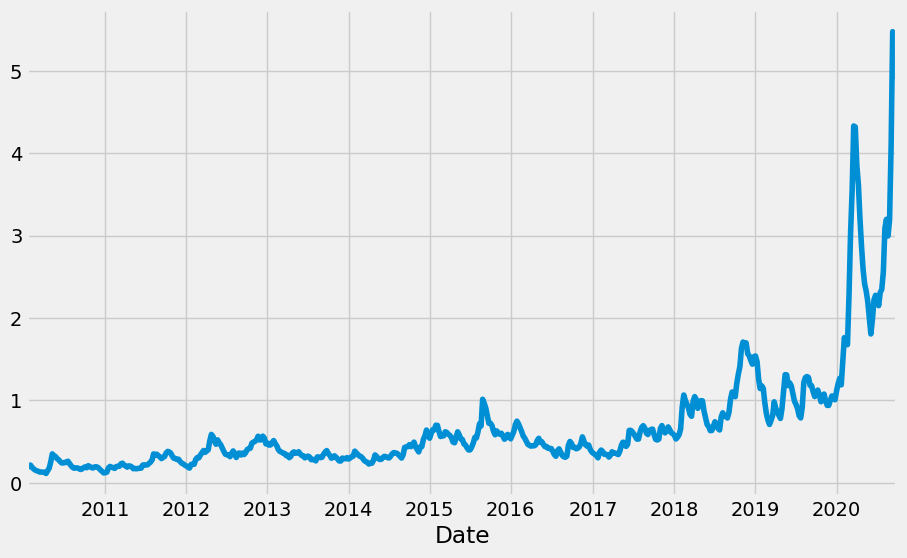

In [30]:
df2.loc['AAPL'].plot();

## KMeans Clustering

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from datetime import datetime

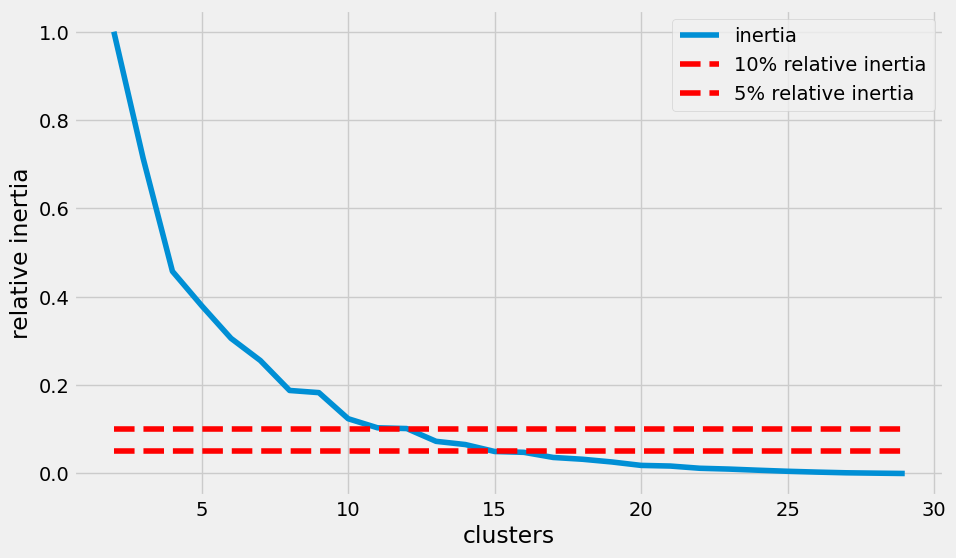

In [33]:
n_clusters = range(2, 30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters, np.divide(inertia, inertia[0]))
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

In [34]:
# Normalize and fit the model

model = Pipeline([
    ("normalization", MinMaxScaler()),
    ("cluster", KMeans(n_clusters=15))
])

In [35]:
model.fit(df2)

labels = model.predict(df2)

In [36]:
labels

array([ 7,  6,  0,  1, 11,  4,  7, 12,  8,  2, 13, 14,  5,  7,  8,  8,  7,
       14, 10,  3,  3,  3,  3, 14,  9,  8,  7,  8,  3], dtype=int32)

In [37]:
df3 = pd.DataFrame({'Cluster': labels,
                    'Companies': dow_stocks,
                    'ATR': df2.mean(axis=1)}
                  ).sort_values(by=['Cluster'], axis = 0)

df3 = df3.reset_index(drop=True)
df3

,Cluster,Companies,ATR
0,0,AXP,1.423845
1,1,BA,3.795881
2,2,GS,3.634566
3,3,WMT,1.113978
4,3,PG,1.029887
5,3,NKE,0.970979
6,3,MSFT,1.286877
7,3,MRK,0.865130
8,4,CRM,2.194788
9,5,IBM,2.097094


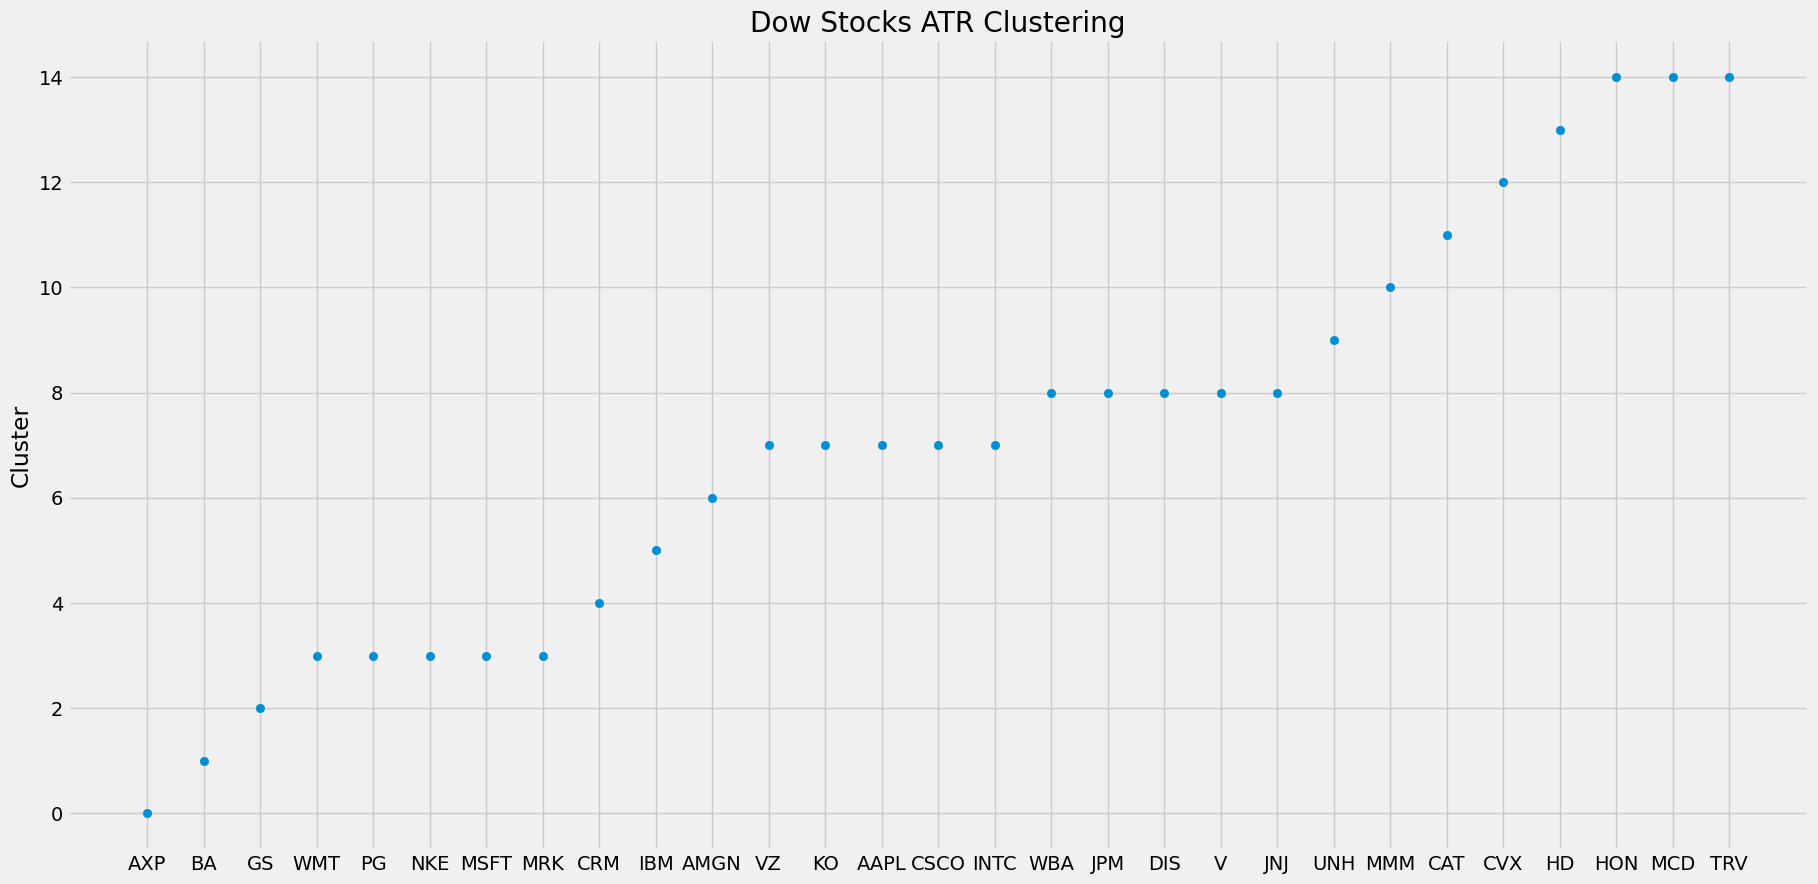

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(df3.Companies, df3.Cluster)
# plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('Dow Stocks ATR Clustering');

In [40]:
model.get_params()

{'memory': None,
 'steps': [('normalization', MinMaxScaler()),
  ('cluster', KMeans(n_clusters=15))],
 'verbose': False,
 'normalization': MinMaxScaler(),
 'cluster': KMeans(n_clusters=15),
 'normalization__clip': False,
 'normalization__copy': True,
 'normalization__feature_range': (0, 1),
 'cluster__algorithm': 'lloyd',
 'cluster__copy_x': True,
 'cluster__init': 'k-means++',
 'cluster__max_iter': 300,
 'cluster__n_clusters': 15,
 'cluster__n_init': 'auto',
 'cluster__random_state': None,
 'cluster__tol': 0.0001,
 'cluster__verbose': 0}

In [41]:
model['cluster'].cluster_centers_

array([[0.20600172, 0.22224828, 0.20073041, ..., 0.19302017, 0.24007448,
        0.25655108],
       [0.25375144, 0.27290247, 0.27547052, ..., 0.63158519, 0.69091207,
        0.78540475],
       [1.        , 1.        , 1.        , ..., 0.41728015, 0.50756269,
        0.58405082],
       ...,
       [0.17391485, 0.17032149, 0.18617244, ..., 0.14134252, 0.16628148,
        0.18825577],
       [0.06321376, 0.05600472, 0.06148467, ..., 0.56660659, 0.63126522,
        0.65825374],
       [0.12543238, 0.12820628, 0.13041423, ..., 0.26808135, 0.31106692,
        0.34299036]])

In [42]:
model['cluster'].cluster_centers_.shape

(15, 559)

In [43]:
df3.to_csv('dow_cluster_new_2024.csv')

## Self Organizing Maps

In [54]:
from minisom import MiniSom
import random

In [55]:
random.seed(2024)
np.random.seed(2024)

In [56]:
df = pd.read_csv('dow_cluster_new_2024.csv', index_col=0)
df

,Cluster,Companies,ATR
0,0,AXP,1.423845
1,1,BA,3.795881
2,2,GS,3.634566
3,3,WMT,1.113978
4,3,PG,1.029887
5,3,NKE,0.970979
6,3,MSFT,1.286877
7,3,MRK,0.865130
8,4,CRM,2.194788
9,5,IBM,2.097094


In [57]:
# Define feature matrix
X = df[['ATR']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.28169828],
       [1.        ],
       [0.95115051],
       [0.18786431],
       [0.16239971],
       [0.14456124],
       [0.24022173],
       [0.11250777],
       [0.51515578],
       [0.48557217],
       [0.65789893],
       [0.03444304],
       [0.        ],
       [0.05562472],
       [0.01357174],
       [0.06131964],
       [0.19018704],
       [0.24708851],
       [0.30092505],
       [0.30526173],
       [0.24619324],
       [0.68353065],
       [0.48736202],
       [0.47994718],
       [0.34469843],
       [0.45255942],
       [0.33719139],
       [0.35064746],
       [0.28176221]])

In [58]:
# Initialize a 15x15 SOM - Thumb rule is 5 * sqrt(n) > 5x5 SOM
som = MiniSom(5, 5, 1, learning_rate=0.5, sigma=5, random_seed=42)

som.random_weights_init(X)

som.train_batch(X, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0473346175569777


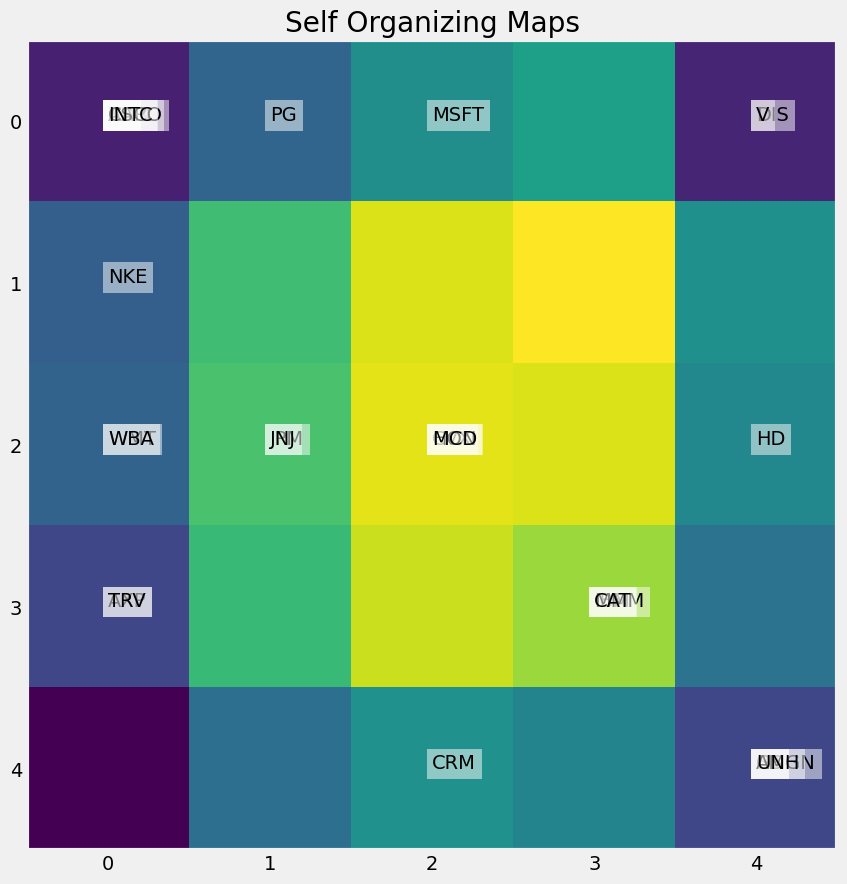

In [62]:
plt.figure(figsize=(20, 10))

for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], 
             winner[1], 
             df.Companies[ix], 
             bbox=dict(facecolor='white', 
                       alpha=0.5,
                       lw=0)
            )
plt.imshow(som.distance_map())
plt.grid(False)
plt.title('Self Organizing Maps');

In [63]:
# List the corresponding companies

for ix in range(len(X)):
    winner = som.winner(X[ix])
    print(winner[0], winner[1], df['Companies'][ix])

0 3 AXP
4 4 BA
4 4 GS
0 2 WMT
1 0 PG
0 1 NKE
2 0 MSFT
0 0 MRK
2 4 CRM
3 3 IBM
4 4 AMGN
0 0 VZ
0 0 KO
0 0 AAPL
0 0 CSCO
0 0 INTC
0 2 WBA
1 2 JPM
4 0 DIS
4 0 V
1 2 JNJ
4 4 UNH
3 3 MMM
3 3 CAT
2 2 CVX
4 2 HD
2 2 HON
2 2 MCD
0 3 TRV
